---

5.2.2 
---


---

NOTE: Germany left the Bretton Woods System in March 1973. This will be indicated by a red dotted line at this date. 

Part 1: Data Import and Preprocessing
If you haven’t already loaded and preprocessed the data, run this first. This step ensures we have the correct timeframe (January 1960 to December 1990) and the dataset is properly formatted.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('combined_data.csv')

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the required period
start_date = pd.to_datetime('1960-01-01')
end_date = pd.to_datetime('1990-12-31')
df_full = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# Display the first few rows for confirmation
print(df_full.head())


        Date  Industrial Production  Exchange Rate    Reserves    CPI  \
1 1960-01-01                  31.19            4.2  4724160000  24.62   
2 1960-02-01                  31.04            4.2  4806360000  24.48   
3 1960-03-01                  32.20            4.2  4966460000  24.48   
4 1960-04-01                  34.29            4.2  5236120000  24.62   
5 1960-05-01                  33.73            4.2  5417090000  24.69   

   Exchange Rate Growth  US CPI  Real Exchange Rate  \
1                   0.0   13.44            2.292770   
2                   0.0   13.48            2.312745   
3                   0.0   13.48            2.312745   
4                   0.0   13.53            2.308123   
5                   0.0   13.53            2.301580   

   Real Exchange Rate Growth  Real Exchange Rate Index  \
1                  -0.296736                  1.710053   
2                   0.871217                  1.724951   
3                   0.000000                  1.724951  

Part 2: Plotting Inflation Graphs
This section plots:

Monthly inflation in Germany
The difference between monthly inflation in Germany vs. the US

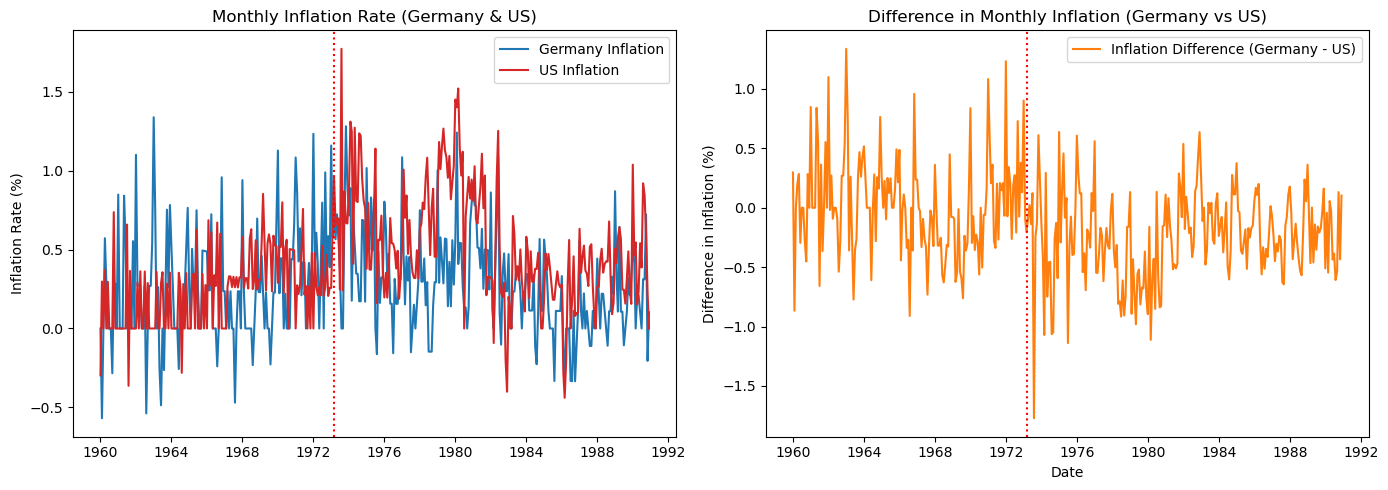

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "combined_data.csv"  # Update this if needed
df = pd.read_csv(file_path, parse_dates=["Date"])

# Filter for Germany only
df_germany = df[df["Country"] == "Germany"].copy()

# Ensure numeric types for calculations
df_germany["Monthly Inflation Rate"] = pd.to_numeric(df_germany["Monthly Inflation Rate"], errors="coerce")
df_germany["US CPI"] = pd.to_numeric(df_germany["US CPI"], errors="coerce")

# Compute the monthly inflation rate for the US (assuming CPI changes reflect inflation)
df_germany["US Monthly Inflation Rate"] = df_germany["US CPI"].pct_change() * 100

# Compute the difference between Germany and US inflation rates
df_germany["Inflation Difference"] = df_germany["Monthly Inflation Rate"] - df_germany["US Monthly Inflation Rate"]

# Create the inflation plots
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# Plot 1: Germany and US Monthly Inflation Rates
axs[0].plot(df_germany["Date"], df_germany["Monthly Inflation Rate"], label="Germany Inflation", color="tab:blue")
axs[0].plot(df_germany["Date"], df_germany["US Monthly Inflation Rate"], label="US Inflation", color="tab:red")
axs[0].axvline(pd.Timestamp("1973-03-01"), color="red", linestyle="dotted", linewidth=1.5)
axs[0].set_title("Monthly Inflation Rate (Germany & US)")
axs[0].set_ylabel("Inflation Rate (%)")
axs[0].legend()

# Plot 2: Difference between Germany and US Inflation Rates
axs[1].plot(df_germany["Date"], df_germany["Inflation Difference"], label="Inflation Difference (Germany - US)", color="tab:orange")
axs[1].axvline(pd.Timestamp("1973-03-01"), color="red", linestyle="dotted", linewidth=1.5)
axs[1].set_title("Difference in Monthly Inflation (Germany vs US)")
axs[1].set_ylabel("Difference in Inflation (%)")
axs[1].legend()

# Improve layout and show
plt.xlabel("Date")
plt.tight_layout()
plt.show()


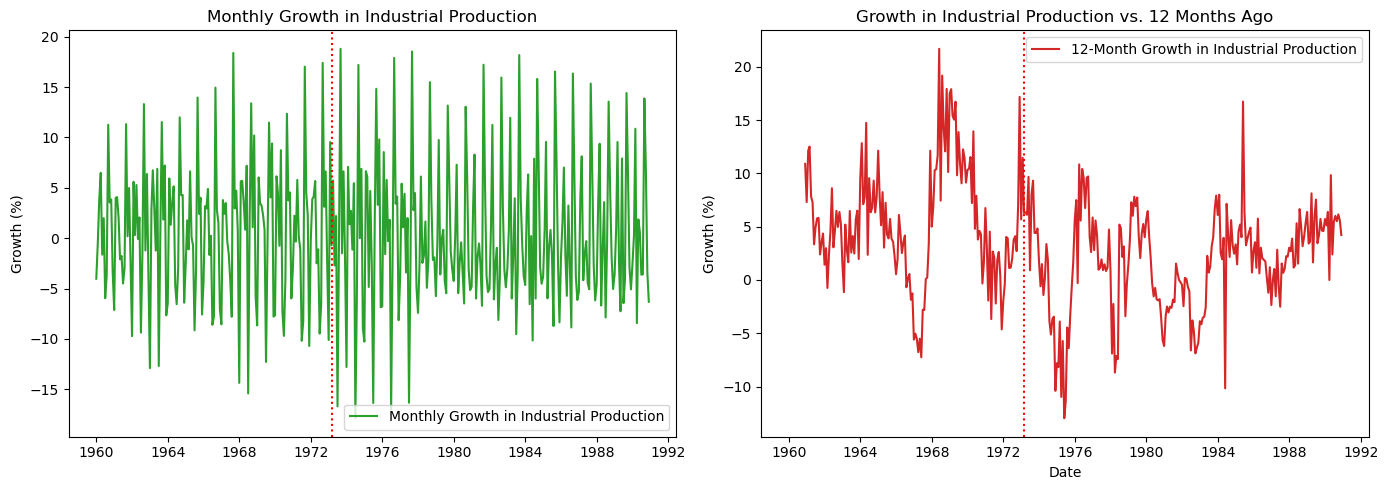

In [3]:
# Create a figure with 2 subplots (1 row x 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharex=True)

# Plot 1: Monthly Growth in Industrial Production
axs[0].plot(df_full['Date'], df_full['Monthly Industrial Production Growth'], label='Monthly Growth in Industrial Production', color='tab:green')
axs[0].axvline(pd.Timestamp("1973-03-01"), color='red', linestyle='dotted', linewidth=1.5)
axs[0].set_title('Monthly Growth in Industrial Production')
axs[0].set_ylabel('Growth (%)')
axs[0].legend()

# Plot 2: Growth in Industrial Production vs. 12 Months Ago
axs[1].plot(df_full['Date'], df_full['Growth in Industrial Production'], label='12-Month Growth in Industrial Production', color='tab:red')
axs[1].axvline(pd.Timestamp("1973-03-01"), color='red', linestyle='dotted', linewidth=1.5)
axs[1].set_title('Growth in Industrial Production vs. 12 Months Ago')
axs[1].set_ylabel('Growth (%)')
axs[1].legend()

# Improve layout and show
plt.xlabel('Date')
plt.tight_layout()
plt.show()



The Monthly Growth Rate measures the percentage change in industrial production from one month to the next.

The 12 Monthly Growth rate measures the percentage change in industrial production compared to the same month in the previous year.
 
**Why Are the Monthly vs. 12-Month Growth in Industrial Production So Different?**
---

The main reason as to why the two indices differ so much has a lot to do with seasonality and volatility. The monthly growth rate measure short term changes in industrial production one month to the next, and hence seasonal demand fluctuations, strikes and supply chain issues affect the growth rate to a much greater extent than YoY comparisons, which implicitly account for seasonal changes (giving us a hint as to which is more useful).

All the factors which are temporary affect monthly growth rates to a much larger extent, hence making the growth pattern seem more erratic and random, which is also depicted in the graph above, which is a series of peaks and troughs in quick succession.

As aforementioned the 12 month growth rate compares production in the same time of the year eliminating the cyclicality and seasonality. This not only helps us more easily identify long term trends, but also gives a clearer view of key points of contraction and expansion within the industry. 

**Which Measure Is More Useful?**
---


This largely depends on what the viewer's aim is and what the data's intended use is. 

If someone is focusing on short term fluctuations or shock's impact on industrial production, the month on month growth may be more useful as it is extremely sensitive to small changes on a short term duration and hence it can be a lot easier to identify significant events. However even when being used for this function it may have some limitations: for example it may be hard to isolate what causes price fluctuation as the monthly rate is extremely sensitive to very many factors. The monthly inflation rate helps perhaps if you are a short term investor or analyst looking into momentum and spikes to inform real time quick decision making to react to market movements.

Obviously, for longer term trends, in an analysis of the industry, the 12 month growth will have an advantage, smoothing out seasonal fluctuations. This helps inform macroeconomic study or policy decision and is a more reliable narration of the production industry. It gives a smoother and also more comparable measure of industrial growth production despite perhaps being slower to react to shifts in the industry. 

So the 12 month growth chart is far more informative if we aim to determine something about the industry or compare the German Industry internationally. 

----

5.2.4
---


----



In [4]:
import pandas as pd

# Ensure Date column is in datetime format
df_germany["Date"] = pd.to_datetime(df_germany["Date"])

# Set Date as the index for resampling
df_germany.set_index("Date", inplace=True)

# Function to calculate 6-month standard deviation
def calculate_6_month_std(df, column):
    return df[column].resample("6M").std()

# Compute 6-month standard deviations
std_real_exch_growth = calculate_6_month_std(df_germany, "Real Exchange Rate Growth")
std_inflation_diff = calculate_6_month_std(df_germany, "Inflation Difference")
std_industrial_growth = calculate_6_month_std(df_germany, "Growth in Industrial Production")

# Merge results into a single DataFrame
std_data = pd.DataFrame({
    "Std_Real_Exchange_Growth": std_real_exch_growth,
    "Std_Inflation_Diff": std_inflation_diff,
    "Std_Industrial_Growth": std_industrial_growth
}).dropna()

# Reset index to keep Date as a column
std_data.reset_index(inplace=True)

# Display the results
print(std_data)


         Date  Std_Real_Exchange_Growth  Std_Inflation_Diff  \
0  1961-06-30                  1.802296            0.423240   
1  1961-12-31                  0.446959            0.447733   
2  1962-06-30                  0.448470            0.453224   
3  1962-12-31                  0.402818            0.402920   
4  1963-06-30                  0.778082            0.783282   
5  1963-12-31                  0.353738            0.354892   
6  1964-06-30                  0.374165            0.374408   
7  1964-12-31                  0.347659            0.349568   
8  1965-06-30                  0.145934            0.146376   
9  1965-12-31                  0.182841            0.183698   
10 1966-06-30                  0.331782            0.332857   
11 1966-12-31                  0.627666            0.630132   
12 1967-06-30                  0.202582            0.202756   
13 1967-12-31                  0.249847            0.248609   
14 1968-06-30                  0.318900            0.32

/tmp/ipykernel_4830/3967437340.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return df[column].resample("6M").std()


Here is the manual calculation result for January to June 1964 for each of the three variables, (this equals row 6 above):

**Real Exchange Rate Growth:**

Values: [-0.5147, -0.2567, 0.0, 0.0, 0.0, 0.6111]
Mean = -0.0267

Standard Deviation = 0.3742

**Inflation Difference:***

Values: [0.5174, 0.2574, 0.0, 0.0, 0.0, -0.6096]
Mean = 0.0275

Standard Deviation = 0.3744

**Industrial Growth:**

Values: [9.5155, 12.8386, 7.1108, 7.7812, 14.7426, 2.3595]
Mean = 9.0580

Standard Deviation = 4.4070

In [5]:
import statsmodels.api as sm
import numpy as np

# Prepare regression data
X = std_data["Std_Real_Exchange_Growth"]
X_poly = np.column_stack((X, X**2))  # Quadratic term
X = sm.add_constant(X)
X_poly = sm.add_constant(X_poly)

# Linear regressions
model_linear_inflation = sm.OLS(std_data["Std_Inflation_Diff"], X).fit()
model_linear_industrial = sm.OLS(std_data["Std_Industrial_Growth"], X).fit()

# Polynomial regressions
model_poly_inflation = sm.OLS(std_data["Std_Inflation_Diff"], X_poly).fit()
model_poly_industrial = sm.OLS(std_data["Std_Industrial_Growth"], X_poly).fit()

# Output regression summaries
print("Linear Regression - Inflation Difference:\n", model_linear_inflation.summary())
print("\nPolynomial Regression - Inflation Difference:\n", model_poly_inflation.summary())
print("\nLinear Regression - Industrial Growth:\n", model_linear_industrial.summary())
print("\nPolynomial Regression - Industrial Growth:\n", model_poly_industrial.summary())


Linear Regression - Inflation Difference:
                             OLS Regression Results                            
Dep. Variable:     Std_Inflation_Diff   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                    0.3612
Date:                Sat, 22 Mar 2025   Prob (F-statistic):              0.550
Time:                        10:59:42   Log-Likelihood:                 34.609
No. Observations:                  60   AIC:                            -65.22
Df Residuals:                      58   BIC:                            -61.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

Commenting on the above results for linear and polynomial regression: 

**Inflation Difference:** 

_Key Linear Regression Stats:_

Coefficient Beta 1: 0.0082
Standard Error: 0.014 
t statistic: 0.601 
p value: 0.55 
R squared: 0.006

Comments: We see a very small positive coefficient between Inflation Difference and Real Exchange Rate Growth 6 Month Standard deviation. Furthermore this is coupled with an extremely low r squared parameter indicating that the data points lie far away from our line of best fit hence adding to the lack of a significant correlation between the two. And to conclude and confirm this is a non statistically significant p value at a 5% significance level ultimately helping us conclude there is lack of a linear correlation illustrated between our two variables for this particular data set. This suggests that using a linear model to understand inflation volatility in response to exchange rate shocks may be an oversimplification of a more complex relationship.

_Key Polynomial Regression Stats:_

Coefficient Beta 1 (Linear Term): -0.1158
Coefficient Beta 2 (Quadratic Term): 0.0290
Standard Errors: 0.036 (Beta 1), 0.008 (Beta 2)
t statistics: -3.227 (Beta 1), 3.684 (Beta 2)
p values: 0.002 (Beta 1), 0.001 (Beta 2)
R squared: 0.197

Comments: The polynomial model reveals a U-shaped relationship between inflation difference and the 6-month standard deviation of real exchange rate growth. The significant negative coefficient on the linear term followed by a positive and significant quadratic term suggests that inflation difference initially decreases as exchange rate volatility rises, but begins to increase again at higher levels of volatility. The r squared value of 0.197, though still modest, is much higher than the linear model and indicates a better fit: this indicates that 19.7% of the variation is explained by variance of Inflation Difference. With extremely small p values, the high statistical significance of both terms confirms the presence of a non-linear relationship, suggesting that exchange rate volatility may affect inflation difference only beyond a certain threshold. Hence as a result it may be that the two variables follow a quadratic correlation rather than linear one. This pattern could be interpreted as moderate exchange rate volatility helping stabilize inflation expectations (perhaps via policy credibility), while excessive volatility becomes heavily inflationary and disruptive.

**Industrial Production Growth:** 

_Key Linear Regression Stats:_

Coefficient Beta 1: -0.0963
Standard Error: 0.134
t statistic: -0.716
p value: 0.477
R squared: 0.009

Comments: The relationship between real exchange rate volatility and industrial production growth volatility appears nonexistent in this model. The coefficient is slightly negative, but it is not statistically significant, and the r squared value is extremely low (0.009), meaning almost none of the variation is explained by the model. With a p-value well above 0.05, this regression gives no evidence of a linear correlation, and the data likely behaves independently of exchange rate volatility in this context.  This suggests that short-run industrial production growth movements are likely driven by other factors rather than movements in exchange rates.

_Key Polynomial Regression Stats:_

Coefficient Beta 1 (Linear Term): -0.3612
Coefficient Beta 2 (Quadratic Term): 0.0620
Standard Errors: 0.390 (Beta 1), 0.086 (Beta 2)
t statistics: -0.926 (Beta 1), 0.724 (Beta 2)
p values: 0.358 (Beta 1), 0.472 (Beta 2)
R squared: 0.018


Comments: The polynomial model does not offer any substantial improvement over the linear one. Both the linear and quadratic terms are statistically insignificant, and the r squared remains extremely low at 0.018, indicating the model still fails to explain the variation in industrial production growth volatility. The lack of significant coefficients suggests that even in a nonlinear framework, exchange rate volatility has no measurable impact on the volatility of industrial production growth over 6-month periods in this dataset. The near-zero explanatory power across both models reinforces the idea that industrial volatility is insulated from currency fluctuations. In contrast to inflation, production responses may lag making them less responsive over short horizons like 6 months.

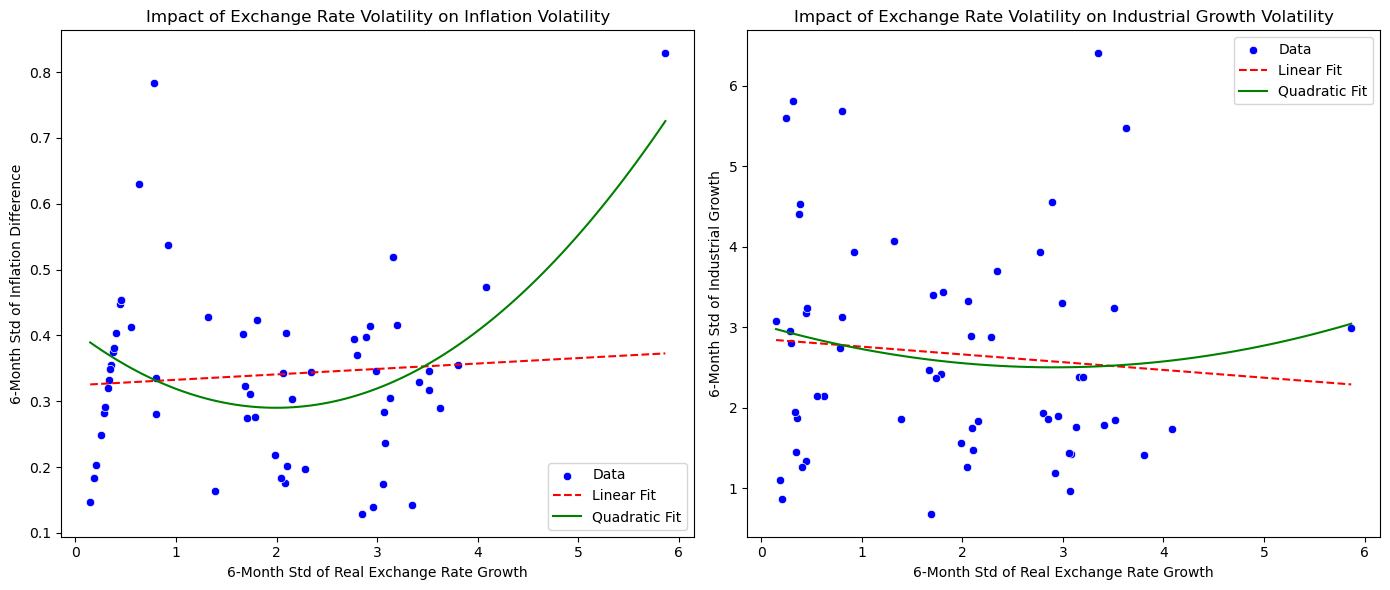

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Generate predictions for plotting
X_range = np.linspace(std_data["Std_Real_Exchange_Growth"].min(), std_data["Std_Real_Exchange_Growth"].max(), 100).reshape(-1, 1)
X_range_poly = np.column_stack((X_range, X_range**2))
X_range = sm.add_constant(X_range)
X_range_poly = sm.add_constant(X_range_poly)

# Predict values for both linear and quadratic regressions
inflation_pred_linear = model_linear_inflation.predict(X_range)
industrial_pred_linear = model_linear_industrial.predict(X_range)
inflation_pred_poly = model_poly_inflation.predict(X_range_poly)
industrial_pred_poly = model_poly_industrial.predict(X_range_poly)

# Create side-by-side scatter plots with best-fit lines
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Graph 1: Std of Inflation Difference vs. Std of Real Exchange Rate Growth
sns.scatterplot(x=std_data["Std_Real_Exchange_Growth"], y=std_data["Std_Inflation_Diff"], ax=axs[0], color="blue", label="Data")
axs[0].plot(X_range[:, 1], inflation_pred_linear, label="Linear Fit", color="red", linestyle="dashed")
axs[0].plot(X_range[:, 1], inflation_pred_poly, label="Quadratic Fit", color="green")
axs[0].set_title("Impact of Exchange Rate Volatility on Inflation Volatility")
axs[0].set_xlabel("6-Month Std of Real Exchange Rate Growth")
axs[0].set_ylabel("6-Month Std of Inflation Difference")
axs[0].legend()

# Graph 2: Std of Industrial Growth vs. Std of Real Exchange Rate Growth
sns.scatterplot(x=std_data["Std_Real_Exchange_Growth"], y=std_data["Std_Industrial_Growth"], ax=axs[1], color="blue", label="Data")
axs[1].plot(X_range[:, 1], industrial_pred_linear, label="Linear Fit", color="red", linestyle="dashed")
axs[1].plot(X_range[:, 1], industrial_pred_poly, label="Quadratic Fit", color="green")
axs[1].set_title("Impact of Exchange Rate Volatility on Industrial Growth Volatility")
axs[1].set_xlabel("6-Month Std of Real Exchange Rate Growth")
axs[1].set_ylabel("6-Month Std of Industrial Growth")
axs[1].legend()

plt.tight_layout()
plt.show()



**Implicitly Run Regressions for Best-Fit Lines**

**Linear Regression**
**Equation Form:**

Y = beta0 + beta1 X + epsilon

This regression assumes a **linear relationship** between the **6-month standard deviation of real exchange rate growth** (X) and the dependent variables:
  - **6-month standard deviation of inflation difference** (Y1)
  - **6-month standard deviation of industrial growth** (Y2)

- The estimated equations are:

Y1 = 0.3244 + 0.0082 X 

Y2 = 2.8553 + 0.0963 X 

- The **red dashed line** in the plots represents this regression.


**Quadratic (Polynomial) Regression**
**Equation Form:**

Y = beta0 + beta1 X + beta2 X^2 + epsilon


This regression accounts for **nonlinear effects**, meaning that changes in **real exchange rate volatility** might have an accelerating or decelerating effect on the dependent variables and may not follow a linear trajectory. A polynomial expression may better explain the relationship between the two variables compared to the 6 Month Standard Deviation of Real Exchange Rate.

The estimated equations are:

Y1 = 0.4056 - 0.1158 X + 0.0290 X^2 

Y2 = 3.0289 - 0.3612 X + 0.0620 X^2 

- The **green curved line** in the plots represents this regression.

Both of these refer to the regressions we have run above.

----


5.2.5
---

--- 


**Taken together, what does your analysis in Section 5.2 imply about the effect of real exchange rate fluctuations?**

Our results help us back the conclusion that the real exchange rate has minor if any effect on the real economy. 

As backed by parts 5.2.2 we see that after our red dotted line on March 1973, there is no substantial visible change to either Monthly or 12 Month Growth in Industrial Production. Same for the MOnthly Inflation Rate and difference between the US and Germany. We do see that there is a large fall in 12 month growth in industrial production following our red line, but this is not due to real exchange rate changes, but rather due to the Arab Oil Embargo and hence the subsequent oil crisis that leads to a sharp rise in oil prices and hence supply chain difficulties especially within the industrial production sector. There seems to be no other visible change as a result of leaving the Bretton Wood System and fluctuations of real exchange rates.

Furthermore, 5.2.4 shows us that there is a minimal polynomial correlation between the 6 month standard deviation of Real Exchange Growth with Inflation difference, but this is the only regression that provides a significant statistical hypothesis test at a p value of 0.002 and 0.001 for beta 1 and 2 at the 5% significance level. However, when we visualise these results we again see, despite statistical significance the trend seems to be very influenced by outliers at the top corner extremities, with significant bunching of data points in the bottom left corner. Regardless, all other regressions are not statistically significant and have an extremely low r sqaured hinting to the large unexplained variance of data points from the line of best fit not explained by the variance of the dependent variable. As a result this again leads us to the conclusion that real exchange rates have at most, a minimal impact on macroeconomic performance. 

Whilst we do see the end of Bretton Woods led to a significant increase in the volatility levels of real exchange rates, these have no subsequent effects. We do note that exchange rate fluctuation is important to assess debt deflation and inflation, but we do not focus on this and it is only pertinent if the debt is held in a very large quantity of foreign currency. 



**How is the end of Bretton Woods being a ‘natural experiment’ important for your conclusions here?**

This is important as it helps us truly isolate the effect of a shift in real exchange rate volatility. Real and nominal exchange rate volatility discontinuously changed, whereas other factors such as Inflation and Industrial Production were changing continuously. This discontinuity helps us to isolate the effect of real exchange rate volatility on other factors within the economy, and it would be harder for us to draw conclusions about certain correlations had this natural experiment not isolated this impact. The Bretton Woods system was credible and persistent and the new system has been permanent in moving from a fully fixed exchange rate to a fully flexible one gives us an important event to look at a variety of countries across the world and draw meaningful conclusions about the inetrplay of macroeconomic parameters. 

The end of the system introduced a sudden exogenous shock reducing the concerns one may usually have to do with reverse causality: the collapse was not driven by domestic German policy and makes the exchange rate more plausibly exogenous, allowing for greater isolation. Hence this regression discontinuity design makes it easier to highlight identify and justify any causal implications we may observe.

